# Importing Libraries

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
%matplotlib inline

# Loading the Dataset

In [149]:
df =  pd.read_excel('card_customer_data.xlsx')
df.head()

,CLIENTNUM,Education_Level,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct
0,769911858,High School,Blue,34,3,4,3313.0,2517,0.760,1171,20
1,713061558,Graduate,Blue,36,3,1,4010.0,1247,0.311,1088,24
2,818906208,High School,Silver,27,2,2,29081.0,1396,0.048,1538,36
3,710599683,College,Blue,36,3,6,11751.0,0,0.000,1539,17
4,712396908,Graduate,Blue,48,5,2,2436.0,680,0.279,1570,29


In [150]:
print('The shape of the dataset is :',df.shape)

The shape of the dataset is : (3078, 11)


In [151]:
df['Card_Category'].value_counts()

Blue        2866
Silver       166
Gold          34
Platinum      12
Name: Card_Category, dtype: int64

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 3078 non-null   int64  
 1   Education_Level           3078 non-null   object 
 2   Card_Category             3078 non-null   object 
 3   Months_on_book            3078 non-null   int64  
 4   Total_Relationship_Count  3078 non-null   int64  
 5   Months_Inactive_12_mon    3078 non-null   int64  
 6   Credit_Limit              3078 non-null   float64
 7   Total_Revolving_Bal       3078 non-null   int64  
 8   Avg_Utilization_Ratio     3078 non-null   float64
 9   Total_Trans_Amt           3078 non-null   int64  
 10  Total_Trans_Ct            3078 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 264.6+ KB


# Checking Null values

In [153]:
df.isnull().sum()

CLIENTNUM                   0
Education_Level             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Utilization_Ratio       0
Total_Trans_Amt             0
Total_Trans_Ct              0
dtype: int64

- So we dont have missing values in the dataset

# Let seperate the Numerical Values and Categorical values

In [154]:
num = df.select_dtypes(include = 'number')
char = df.select_dtypes(include = 'object')

In [155]:
print('The shape of num is',num.shape)
print('The shape of char',char.shape)

The shape of num is (3078, 9)
The shape of char (3078, 2)


### So we have 2 columns of object type.Lets covert it into numerical type

In [156]:
char.head()

,Education_Level,Card_Category
0,High School,Blue
1,Graduate,Blue
2,High School,Silver
3,College,Blue
4,Graduate,Blue


In [157]:
from sklearn.preprocessing import LabelEncoder

In [158]:
le = LabelEncoder()

In [159]:
char_1 = char.apply(le.fit_transform)

In [160]:
char_1

,Education_Level,Card_Category
0,3,0
1,2,0
2,3,3
3,0,0
4,2,0
...,...,...
3073,2,0
3074,2,0
3075,0,0
3076,6,0


# Checking for outliers

In [161]:
num.describe(percentiles = [0.01,0.99])

,CLIENTNUM,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct
count,3.078000e+03,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000
mean,7.385876e+08,35.808317,3.748863,2.343405,8644.321670,1157.112411,0.273851,4394.285575,64.541261
std,3.656861e+07,8.063304,1.555690,0.993973,9162.912233,815.792572,0.277065,3393.536036,23.617003
min,7.080846e+08,13.000000,1.000000,0.000000,1438.300000,0.000000,0.000000,563.000000,10.000000
1%,7.083366e+08,15.000000,1.000000,1.000000,1438.300000,0.000000,0.000000,882.090000,19.000000
50%,7.175999e+08,36.000000,4.000000,2.000000,4511.000000,1279.000000,0.171500,3910.500000,67.000000
99%,8.239793e+08,55.000000,6.000000,5.000000,34516.000000,2517.000000,0.913230,15695.650000,122.000000
max,8.282989e+08,56.000000,6.000000,6.000000,34516.000000,2517.000000,0.994000,17634.000000,139.000000


# Capping and Flooring of Outliers

In [162]:
def outlier_cap(x):
    x=x.clip(lower = x.quantile(0.01))
    x=x.clip(upper = x.quantile(0.99))
    return(x)

In [163]:
num = num.apply(lambda x: outlier_cap(x))

In [164]:
num.describe(percentiles = [0.01,0.99])

,CLIENTNUM,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct
count,3.078000e+03,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000
mean,7.385616e+08,35.815789,3.748863,2.336257,8644.321670,1157.112411,0.273451,4388.499331,64.535737
std,3.650185e+07,7.996110,1.555690,0.957493,9162.912233,815.792572,0.276100,3366.690843,23.419793
min,7.083366e+08,15.000000,1.000000,1.000000,1438.300000,0.000000,0.000000,882.090000,19.000000
1%,7.083374e+08,15.000000,1.000000,1.000000,1438.300000,0.000000,0.000000,885.100700,19.000000
50%,7.175999e+08,36.000000,4.000000,2.000000,4511.000000,1279.000000,0.171500,3910.500000,67.000000
99%,8.239398e+08,55.000000,6.000000,5.000000,34516.000000,2517.000000,0.913053,15685.909500,122.000000
max,8.239793e+08,55.000000,6.000000,5.000000,34516.000000,2517.000000,0.913230,15695.650000,122.000000


In [165]:
num = num.drop(['CLIENTNUM'],axis = 1)

# Building Derived Feature - Avg Spend per Transacation

In [166]:
num['avg_spend'] = num['Total_Trans_Amt']/num['Total_Trans_Ct']

In [167]:
num.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct,avg_spend
0,34,3,4,3313.0,2517,0.760,1171.0,20,58.550000
1,36,3,1,4010.0,1247,0.311,1088.0,24,45.333333
2,27,2,2,29081.0,1396,0.048,1538.0,36,42.722222
3,36,3,5,11751.0,0,0.000,1539.0,19,81.000000
4,48,5,2,2436.0,680,0.279,1570.0,29,54.137931


# Feature Scaling

In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
sc = StandardScaler()
num_std = pd.DataFrame(sc.fit_transform(num),index = num.index,columns = num.columns).add_suffix('_std')

In [170]:
num_std.head()

,Months_on_book_std,Total_Relationship_Count_std,Months_Inactive_12_mon_std,Credit_Limit_std,Total_Revolving_Bal_std,Avg_Utilization_Ratio_std,Total_Trans_Amt_std,Total_Trans_Ct_std,avg_spend_std
0,-0.227121,-0.481448,1.737885,-0.581932,1.667223,1.762509,-0.955841,-1.901937,-0.157105
1,0.023041,-0.481448,-1.395805,-0.505852,0.110202,0.136021,-0.980499,-1.731114,-0.657095
2,-1.102689,-1.124354,-0.351242,2.230732,0.292876,-0.816688,-0.846814,-1.218643,-0.755874
3,0.023041,-0.481448,2.782448,0.339104,-1.418621,-0.990566,-0.846517,-1.944643,0.692184
4,1.524015,0.804363,-0.351242,-0.677659,-0.584940,0.020102,-0.837308,-1.517584,-0.324015


# Checking the Correlation


<AxesSubplot:>

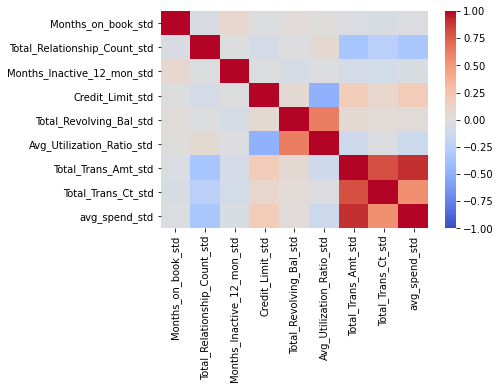

In [171]:
sns.heatmap(num_std.corr(),vmin =-1,vmax=1,center=0,cmap = 'coolwarm')

# Dropping Corrleated Features

In [172]:
num_std.columns

Index(['Months_on_book_std', 'Total_Relationship_Count_std',
       'Months_Inactive_12_mon_std', 'Credit_Limit_std',
       'Total_Revolving_Bal_std', 'Avg_Utilization_Ratio_std',
       'Total_Trans_Amt_std', 'Total_Trans_Ct_std', 'avg_spend_std'],
      dtype='object')

In [173]:
num_1  =  num_std.drop(['Credit_Limit_std','Total_Revolving_Bal_std','Total_Trans_Amt_std',
                    'Total_Trans_Ct_std','Total_Relationship_Count_std'],axis =1)

In [174]:
num_1

,Months_on_book_std,Months_Inactive_12_mon_std,Avg_Utilization_Ratio_std,avg_spend_std
0,-0.227121,1.737885,1.762509,-0.157105
1,0.023041,-1.395805,0.136021,-0.657095
2,-1.102689,-0.351242,-0.816688,-0.755874
3,0.023041,2.782448,-0.990566,0.692184
4,1.524015,-0.351242,0.020102,-0.324015
...,...,...,...,...
3073,0.398285,0.693321,-0.892759,3.628039
3074,0.523366,0.693321,-0.113929,2.617600
3075,0.023041,-0.351242,-0.374747,2.814055
3076,0.023041,0.693321,-0.642809,3.818883


<AxesSubplot:>

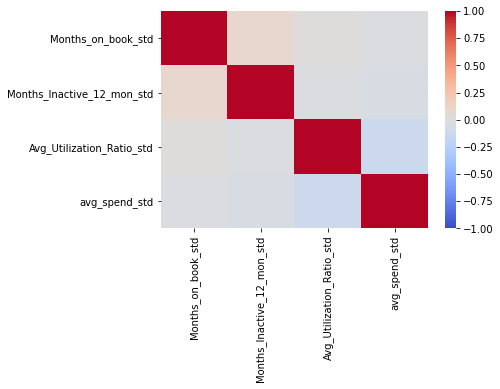

In [175]:
sns.heatmap(num_1.corr(),vmin = -1,vmax = 1,center =0,cmap='coolwarm')

# Run Dendrogram based hierarchial clustering

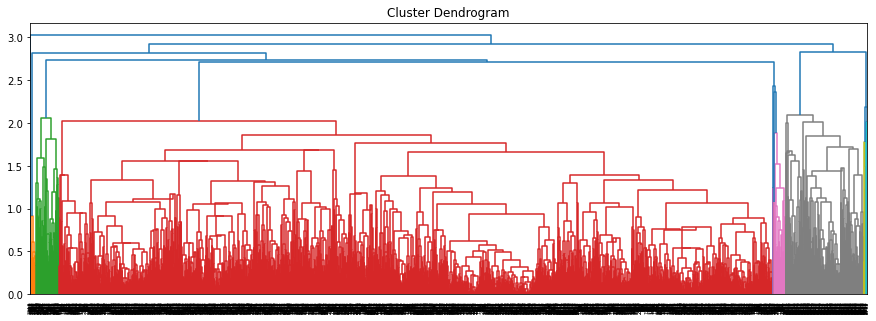

In [57]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (15,5))
plt.title('Cluster Dendrogram')
dend = shc.dendrogram(shc.linkage(num_1,method = 'centroid'))

## looking the Dendrogram output we can see that we are being suggested that there will be 4 clusters.(Green,Red,Pink and Black)

# Building The Cluster

In [176]:
from sklearn.cluster import AgglomerativeClustering

cluster =  AgglomerativeClustering(n_clusters=4,affinity = 'euclidean',linkage = 'complete')
cluster_label = cluster.fit_predict(num_1)
num_1['cluster_label']= pd.DataFrame(cluster_label)

In [177]:
num_1.head()

,Months_on_book_std,Months_Inactive_12_mon_std,Avg_Utilization_Ratio_std,avg_spend_std,cluster_label
0,-0.227121,1.737885,1.762509,-0.157105,0
1,0.023041,-1.395805,0.136021,-0.657095,0
2,-1.102689,-0.351242,-0.816688,-0.755874,0
3,0.023041,2.782448,-0.990566,0.692184,2
4,1.524015,-0.351242,0.020102,-0.324015,0


In [178]:
from sklearn.metrics import silhouette_score
cluster_label = num_1['cluster_label']
silhouette_avg = silhouette_score(num_1,cluster_label)
silhouette_avg

0.33047847644088724

- silhouette_score tells us how far apart the clusters are

## lets check how dense the clusters are .to that i use Davies_bouldin_score

In [179]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(num_1,cluster_label)

1.0791354136144056

In [180]:
num['cluster_label'] = num_1['cluster_label']

In [181]:
num['cluster_label'].value_counts()

0    1790
2     972
1     304
3      12
Name: cluster_label, dtype: int64

In [182]:
num.groupby('cluster_label').agg(['mean'])

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct,avg_spend
,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_label,,,,,,,,,
0,34.856983,3.973184,1.901676,7486.413687,1244.563128,0.331282,3449.227011,61.660335,54.480869
1,34.769737,2.368421,2.059211,14678.461513,1223.450658,0.150345,12586.728618,97.355263,128.686490
2,37.815844,3.782922,3.194444,8834.982819,975.652263,0.207031,3461.201070,59.217078,56.398911
3,43.333333,2.500000,4.666667,13057.166667,1130.083333,0.145583,11919.304167,92.833333,128.193255


In [183]:
# Joining the DataFrame Num and Char

In [184]:
data_all =  pd.concat([num,char],axis = 1,join ='inner')
data_all.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct,avg_spend,cluster_label,Education_Level,Card_Category
0,34,3,4,3313.0,2517,0.760,1171.0,20,58.550000,0,High School,Blue
1,36,3,1,4010.0,1247,0.311,1088.0,24,45.333333,0,Graduate,Blue
2,27,2,2,29081.0,1396,0.048,1538.0,36,42.722222,0,High School,Silver
3,36,3,5,11751.0,0,0.000,1539.0,19,81.000000,2,College,Blue
4,48,5,2,2436.0,680,0.279,1570.0,29,54.137931,0,Graduate,Blue


# Cluster Profiling

In [185]:
pd.crosstab(index = data_all['cluster_label'],columns = data_all['Card_Category'],values = data_all['Card_Category'],aggfunc='count')

Card_Category,Blue,Gold,Platinum,Silver
cluster_label,,,,
0,1698.0,13.0,5.0,74.0
1,236.0,13.0,6.0,49.0
2,921.0,8.0,1.0,42.0
3,11.0,NaN,NaN,1.0


In [187]:
pd.crosstab(index = data_all['cluster_label'],columns = data_all['Card_Category'],values = data_all['Total_Trans_Amt'],aggfunc='mean')

Card_Category,Blue,Gold,Platinum,Silver
cluster_label,,,,
0,3417.355919,4876.076923,3556.0,3922.662162
1,12577.512500,13609.538462,12449.5,12376.562245
2,3408.699620,5413.000000,5418.0,4194.121190
3,11643.422727,NaN,NaN,14954.000000


In [188]:
pd.crosstab(index = data_all['cluster_label'],columns = data_all['Card_Category'],values = data_all['Total_Trans_Ct'],aggfunc='mean')

Card_Category,Blue,Gold,Platinum,Silver
cluster_label,,,,
0,61.466431,72.846154,54.800000,64.608108
1,96.588983,103.692308,106.666667,98.224490
2,58.814332,70.250000,65.000000,65.809524
3,92.636364,NaN,NaN,95.000000


# Plotting the Cluster prfiles

<AxesSubplot:xlabel='cluster_label', ylabel='Avg_Utilization_Ratio'>

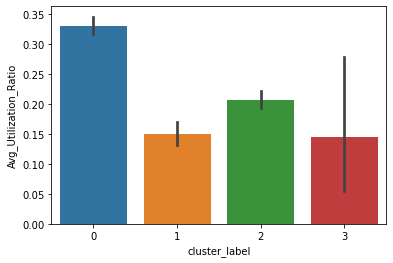

In [192]:
from numpy import mean
sns.barplot(x='cluster_label',y='Avg_Utilization_Ratio',data = data_all,estimator = mean)


<AxesSubplot:xlabel='cluster_label', ylabel='Months_on_book'>

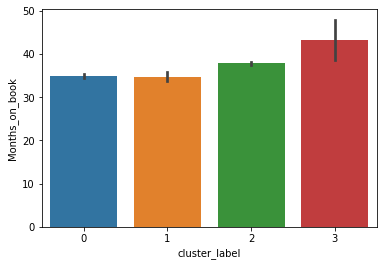

In [193]:
sns.barplot(x='cluster_label',y='Months_on_book',data = data_all,estimator = mean)

<AxesSubplot:xlabel='cluster_label', ylabel='Months_Inactive_12_mon'>

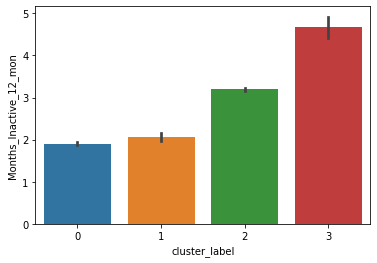

In [194]:
sns.barplot(x='cluster_label',y='Months_Inactive_12_mon',data = data_all,estimator = mean)

<AxesSubplot:xlabel='cluster_label', ylabel='avg_spend'>

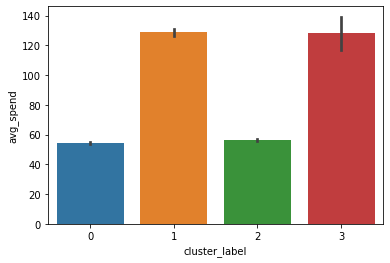

In [195]:
sns.barplot(x='cluster_label',y='avg_spend',data = data_all,estimator = mean)

# Provide the final output

In [197]:
data_cluster_0 = data_all.loc[data_all['cluster_label']==0]
data_cluster_0.shape

(1790, 12)

In [198]:
data_cluster_1 = data_all.loc[data_all['cluster_label']==1]
data_cluster_1.shape

(304, 12)

In [199]:
data_cluster_2 = data_all.loc[data_all['cluster_label']==2]
data_cluster_2.shape

(972, 12)

In [200]:
data_cluster_3 = data_all.loc[data_all['cluster_label']==3]
data_cluster_3.shape

(12, 12)

In [210]:
data_cluster_0.to_csv('C:/Users/Vishwajeet Sangolkar/unsupervised Learnign/data_cluster_0.csv')

In [211]:
data_cluster_1.to_csv('C:/Users/Vishwajeet Sangolkar/unsupervised Learnign/data_cluster_1.csv')

In [212]:
data_cluster_2.to_csv('C:/Users/Vishwajeet Sangolkar/unsupervised Learnign/data_cluster_2.csv')

In [213]:
data_cluster_3.to_csv('C:/Users/Vishwajeet Sangolkar/unsupervised Learnign/data_cluster_3.csv')